# HW#6 Naive Cross-Validation

- 제출기한: 2023.05.20
- 교과서 예제 11.8의 그림 11.27 내용 확인  
- model 2, model 4, model 8에 대하여 training error와 validation error를 측정하고 적절한 모델 선택하시오. (naive cross-validation 사용)

## Dataset

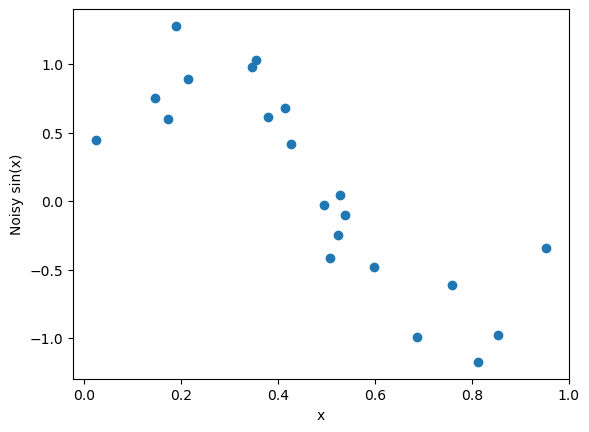

In [47]:
# load in basic libraries and autograd wrapped numpy
from autograd import numpy as np
import matplotlib.pyplot as plt

# load in dataset
datapath = './'
data = np.loadtxt(datapath + 'noisy_sin_sample.csv',delimiter = ',')

plt.xlabel("x")
plt.ylabel("Noisy sin(x)")
plt.plot(data[:,0],data[:,1], 'o')
plt.show()

In [48]:
len(data)

21

## 제출 내용
- Cross-validation 절차 
- training error, validation error vs model capacity

In [100]:
from autograd import grad 
# gradient descent function 
def gradient_descent(g,alpha,max_its,w):
    # compute gradient module using autograd
    gradient = grad(g)

    # run the gradient descent loop
    weight_history = [w] # weight history container
    cost_history = [g(w)] # cost function history container
    for k in range(max_its):
        # evaluate the gradient
        grad_eval = gradient(w)

        # take gradient descent step
        w = w - alpha*grad_eval
        
        # record weight and cost
        weight_history.append(w)
        cost_history.append(g(w))
    return weight_history,cost_history

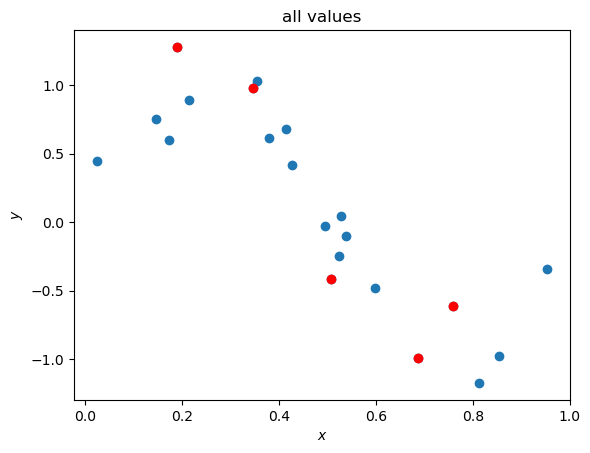

In [101]:
x_data = data[:,0]
y_data = data[:,1]

x_data_train = data[5:21,0]
x_data_valid = data[0:5,0]
y_data_train = data[5:21,1]
y_data_valid = data[0:5,1]

plt.plot(x_data, y_data, 'o')
plt.title('all values')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.plot(x_data_valid, y_data_valid, 'o', color = 'r')
plt.show()

In [104]:
def model2(x,w):
    a = w[0] + np.dot(x.T,w[1]) +  np.dot(x.T**2,w[2])
    return a.T

def model4(x,w):
    a = w[0] + np.dot(x.T,w[1]) + np.dot(x.T**2,w[2]) + np.dot(x.T**3,w[3]) + np.dot(x.T**4,w[4])
    return a.T

def model8(x,w):
    a = w[0] + np.dot(x.T,w[1]) + np.dot(x.T**2,w[2]) + np.dot(x.T**3,w[3]) + np.dot(x.T**4,w[4]) + np.dot(x.T**5,w[5]) + np.dot(x.T**6,w[6]) + np.dot(x.T**7,w[7]) + np.dot(x.T**8,w[8])
    return a.T

def least_squares2(w):
    cost = np.sum((model2(x_data_train.reshape((1,16)),w) - y_data_train)**2)
    return cost/float(np.size(y_data_train))
def least_squares4(w):
    cost = np.sum((model4(x_data_train.reshape((1,16)),w) - y_data_train)**2)
    return cost/float(np.size(y_data_train))
def least_squares8(w):
    cost = np.sum((model8(x_data_train.reshape((1,16)),w) - y_data_train)**2)
    return cost/float(np.size(y_data_train))

def least_squares2_valid(w):
    cost = np.sum((model2(x_data_valid.reshape((1,5)),w) - y_data_valid)**2)
    return cost/float(np.size(y_data_valid))
def least_squares4_valid(w):
    cost = np.sum((model4(x_data_valid.reshape((1,5)),w) - y_data_valid)**2)
    return cost/float(np.size(y_data_valid))
def least_squares8_valid(w):
    cost = np.sum((model8(x_data_valid.reshape((1,5)),w) - y_data_valid)**2)
    return cost/float(np.size(y_data_valid))

In [105]:
# gradient descent
g2 = least_squares2
g4 = least_squares4
g8 = least_squares8 
w_2 = 0.1*np.random.randn(3,1)
w_4 = 0.1*np.random.randn(5,1) 
w_8 = 0.1*np.random.randn(9,1)
max_its = 100000
alpha_choice = 10**(-2)
weight_history_2, cost_history_2 = gradient_descent(g2,alpha_choice,max_its,w_2)
weight_history_4, cost_history_4 = gradient_descent(g4,alpha_choice,max_its,w_4)
weight_history_8, cost_history_8 = gradient_descent(g8,alpha_choice,max_its,w_8)
w_2

array([[ 0.05143915],
       [ 0.1628311 ],
       [-0.04754162]])

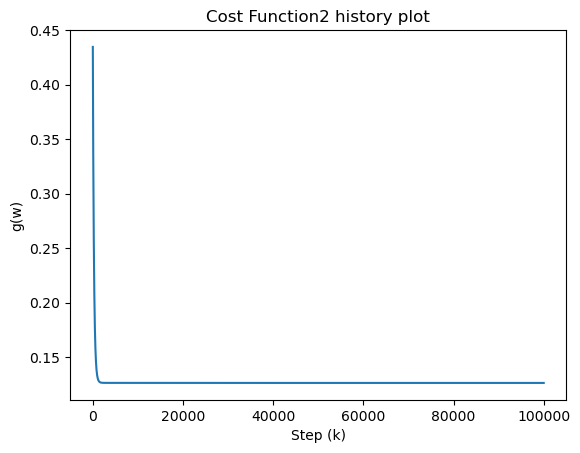

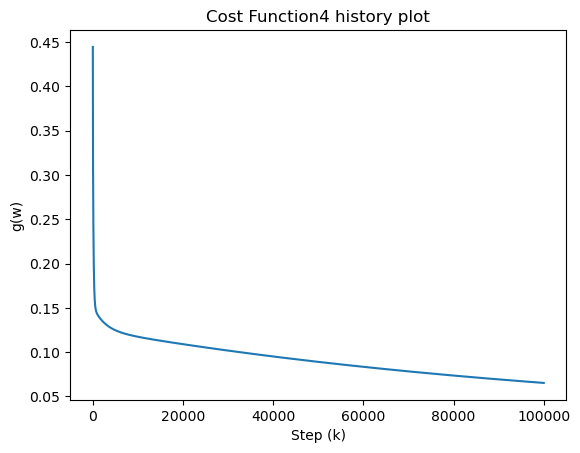

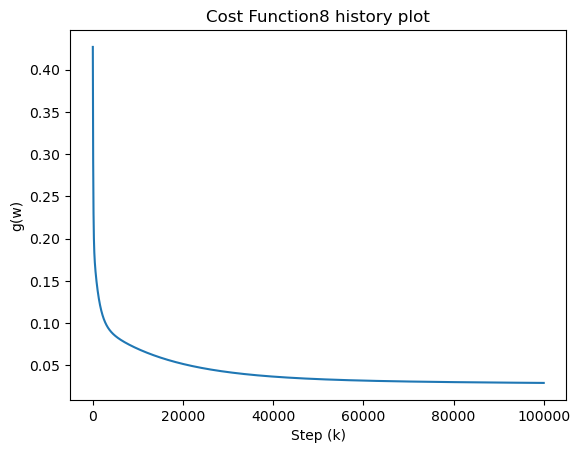

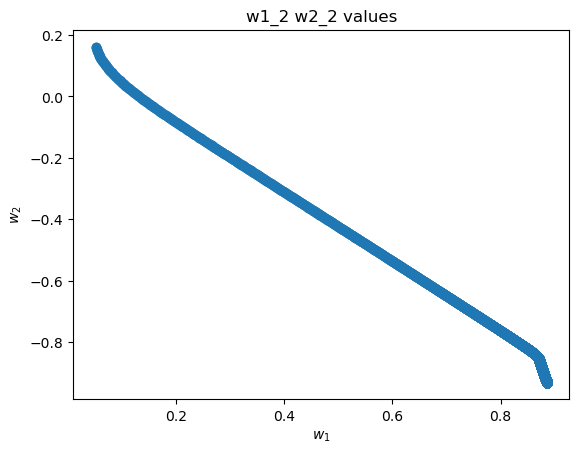

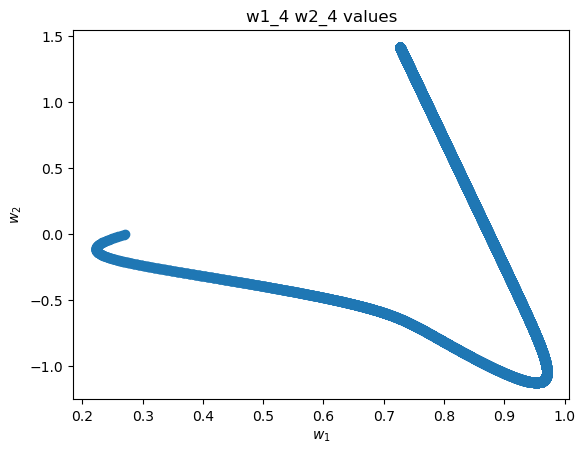

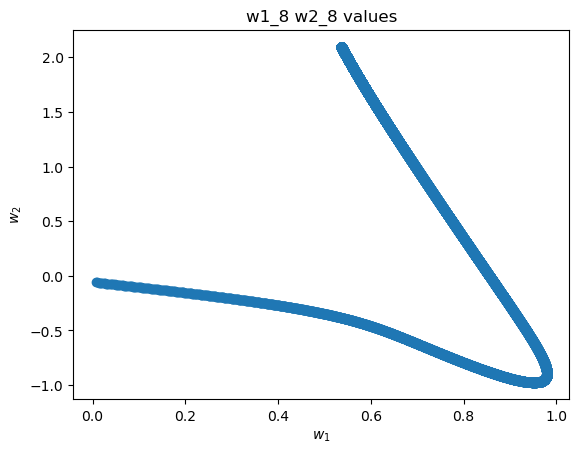

In [106]:
# plot data
plt.plot(cost_history_2)
plt.title('Cost Function2 history plot')
plt.xlabel('Step (k)')
plt.ylabel('g(w)')
plt.show()

plt.plot(cost_history_4)
plt.title('Cost Function4 history plot')
plt.xlabel('Step (k)')
plt.ylabel('g(w)')
plt.show()

plt.plot(cost_history_8)
plt.title('Cost Function8 history plot')
plt.xlabel('Step (k)')
plt.ylabel('g(w)')
plt.show()


w1_2 = []
w2_2 = []
w3_2 = []

w1_4 = []
w2_4 = []
w3_4 = []
w4_4 = []
w5_4 = []

w1_8 = []
w2_8 = []
w3_8 = []
w4_8 = []
w5_8 = []
w6_8 = []
w7_8 = []
w8_8 = []
w9_8 = []


[w1_2.append(a[0]) for a in weight_history_2]
[w2_2.append(a[1]) for a in weight_history_2]
[w3_2.append(a[2]) for a in weight_history_2]

[w1_4.append(a[0]) for a in weight_history_4]
[w2_4.append(a[1]) for a in weight_history_4]
[w3_4.append(a[2]) for a in weight_history_4]
[w4_4.append(a[3]) for a in weight_history_4]
[w5_4.append(a[4]) for a in weight_history_4]

[w1_8.append(a[0]) for a in weight_history_8]
[w2_8.append(a[1]) for a in weight_history_8]
[w3_8.append(a[2]) for a in weight_history_8]
[w4_8.append(a[3]) for a in weight_history_8]
[w5_8.append(a[4]) for a in weight_history_8]
[w6_8.append(a[5]) for a in weight_history_8]
[w7_8.append(a[6]) for a in weight_history_8]
[w8_8.append(a[7]) for a in weight_history_8]
[w9_8.append(a[8]) for a in weight_history_8]


plt.plot(w1_2, w2_2, 'o')
plt.title('w1_2 w2_2 values')
plt.xlabel('$w_1$')
plt.ylabel('$w_2$')
plt.show()

plt.plot(w1_4, w2_4, 'o')
plt.title('w1_4 w2_4 values')
plt.xlabel('$w_1$')
plt.ylabel('$w_2$')
plt.show()

plt.plot(w1_8, w2_8, 'o')
plt.title('w1_8 w2_8 values')
plt.xlabel('$w_1$')
plt.ylabel('$w_2$')
plt.show()

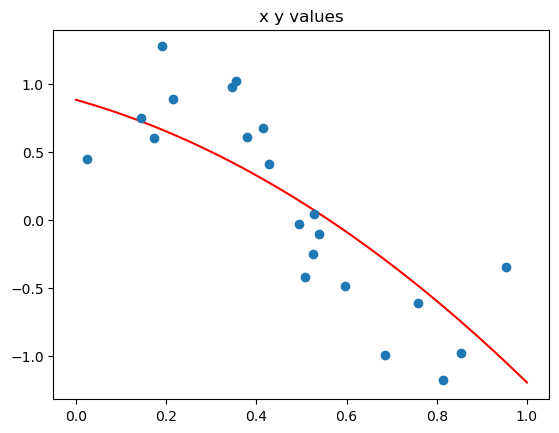

In [107]:
# plot data
x = np.linspace(0,1.0,100)
plt.plot(x, w1_2[100000] + x * w2_2[100000] + x**2 * w3_2[100000],'r')
plt.plot(x_data, y_data, 'o')
plt.title('x y values')
plt.show()

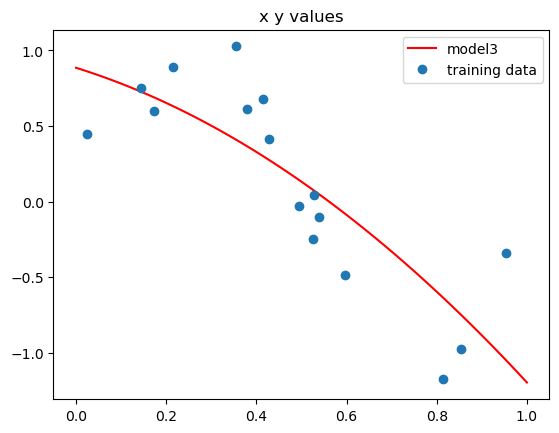

In [108]:
# plot train data
x = np.linspace(0,1.0,100)
plt.plot(x, w1_2[100000] + x * w2_2[100000] + x**2 * w3_2[100000],'r', label = 'model3')
plt.plot(x_data_train, y_data_train, 'o', label = 'training data')
plt.title('x y values')
plt.legend()

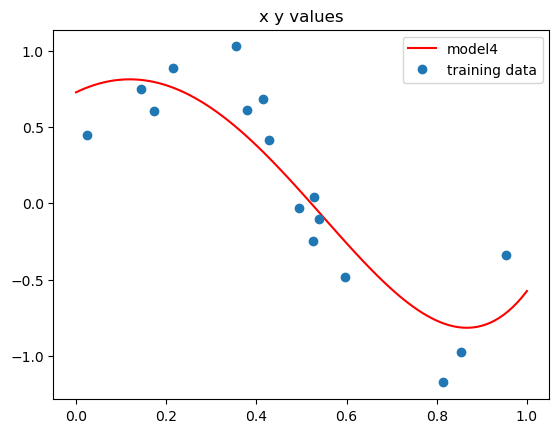

In [109]:
# plot data
x = np.linspace(0,1.0,100)
plt.plot(x, w1_4[100000] + x * w2_4[100000] + x**2 * w3_4[100000] + x**3 * w4_4[100000] + x**4 * w5_4[100000],'r', label = 'model4')
plt.plot(x_data_train, y_data_train, 'o', label = 'training data')
plt.title('x y values')
plt.legend()

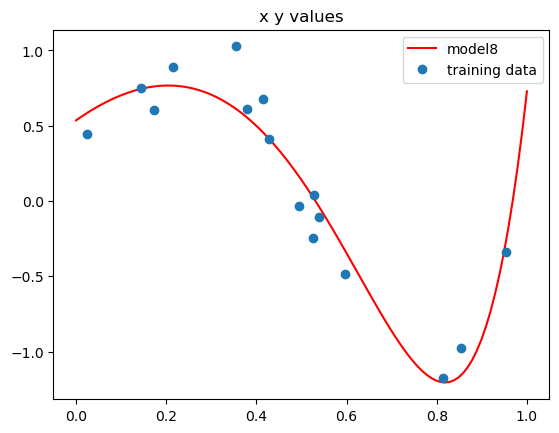

In [110]:
# plot data
x = np.linspace(0,1.0,100)
plt.plot(x, w1_8[100000] + x * w2_8[100000] + x**2 * w3_8[100000] + x**3 * w4_8[100000] + x**4 * w5_8[100000] + x**5 * w6_8[100000] + x**6 * w7_8[100000] + x**7 * w8_8[100000] + x**8 * w9_8[100000] ,'r', label = 'model8')
plt.plot(x_data_train, y_data_train, 'o', label = 'training data')
plt.title('x y values')
plt.legend()

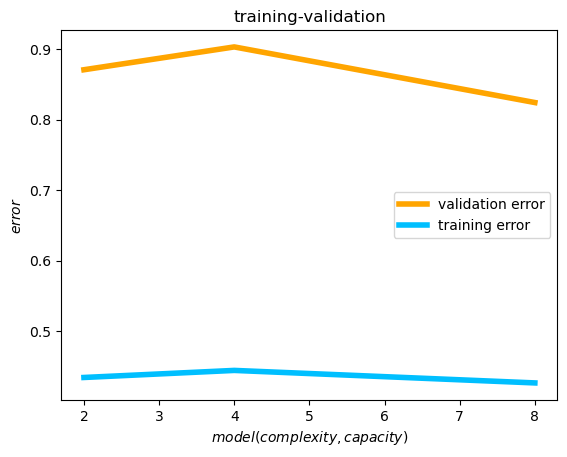

In [111]:
# run gradient descent to minimize the Least Squares cost for linear regression
g2_valid_error_cost = least_squares2_valid(w_2)
g4_valid_error_cost = least_squares4_valid(w_4)
g8_valid_error_cost = least_squares8_valid(w_8)

g2_train_error_cost = least_squares2(w_2)
g4_train_error_cost = least_squares4(w_4)
g8_train_error_cost = least_squares8(w_8)

x = [2,4,8]
valid_y = []
train_y = []

valid_y = np.append(valid_y,g2_valid_error_cost)
valid_y = np.append(valid_y,g4_valid_error_cost)
valid_y = np.append(valid_y,g8_valid_error_cost)

train_y = np.append(train_y,g2_train_error_cost)
train_y = np.append(train_y,g4_train_error_cost)
train_y = np.append(train_y,g8_train_error_cost)


plt.plot(x,valid_y,linestyle='solid',color='orange', linewidth = '4', label = 'validation error')
plt.plot(x,train_y,linestyle='solid',color='deepskyblue', linewidth = '4', label = 'training error')

plt.title('training-validation')
plt.xlabel('$model(complexity, capacity)$')
plt.ylabel('$error$')
plt.legend()

In [ ]:
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

